In [151]:
import pandas as pd
import numpy as np
import networkx as nx
import random
from kuramoto import Kuramoto

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
def sample_NWS(num_samples, nodes, neighbors, probability, half_sync=False):
    df = pd.DataFrame(columns=['kappa', '# Edges', '# Nodes', 'Min Degree', 'Max Degree', 'Diameter', 'Concentrated'])
    
    for i in range(num_samples):
        
        G = nx.newman_watts_strogatz_graph(nodes, neighbors, probability)
        kappa = random.uniform(0.5, 4.5)
        
        if nx.is_connected(G):
            # Number of Edges and Nodes
            edges = G.number_of_edges()
            nodes = G.number_of_nodes()

            # Min and Max degree
            degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
            dmax = max(degree_sequence)
            dmin = min(degree_sequence)

            # Diameter of graph
            diam = nx.diameter(G)
            
            # Applying Kuramoto
            adj_mat = nx.to_numpy_array(G)
            
            if half_sync:
                natfreqs = np.repeat(2 * np.pi * 0, nodes)
                model = Kuramoto(coupling=kappa, dt=0.01, T=50, natfreqs=natfreqs, half_sync=half_sync)
            else:
                model = Kuramoto(coupling=kappa, dt=0.01, T=50, n_nodes=nodes, half_sync=half_sync)
            
            sim = model.run(adj_mat)
            conc = int(model.concentrated)

            df.at[len(df.index)] = [kappa, edges, nodes, dmin, dmax, diam, conc]
    
    return df

In [3]:
num_samples = 10000
nodes = 50
neighbors = 4
probability = 0.80
half_sync = False

df_NWS = sample_NWS(num_samples, nodes, neighbors, probability)
df_NWS

,kappa,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,3.427979,182,50,4,11,4,0
1,4.279666,180,50,5,11,4,1
2,0.76703,180,50,5,10,4,0
3,1.288323,179,50,5,10,4,0
4,3.286695,187,50,5,11,4,0
...,...,...,...,...,...,...,...
9995,1.027659,182,50,4,12,4,0
9996,3.613917,178,50,4,11,4,1
9997,3.076541,169,50,4,10,4,0
9998,1.775517,174,50,4,9,4,0


In [4]:
sum(df_NWS['Concentrated'])

1838

In [5]:
path = f'./datasets/newman_{nodes}_{neighbors}_{probability}_{num_samples}_{half_sync}'
df_NWS.to_csv(path)

In [6]:
def sample_ER(num_samples, half_sync=False):
    df = pd.DataFrame(columns=['kappa', '# Edges', '# Nodes', 'Min Degree', 'Max Degree', 'Diameter', 'Concentrated'])
    
    for i in range(num_samples):
        
        n = random.randint(25, 100)
        p = random.random()
        kappa=random.uniform(0.5, 4.5)
        G = nx.erdos_renyi_graph(n, p)
        
        if nx.is_connected(G):
            # Number of Edges and Nodes
            edges = G.number_of_edges()
            nodes = G.number_of_nodes()

            # Min and Max degree
            degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
            dmax = max(degree_sequence)
            dmin = min(degree_sequence)

            # Diameter of graph
            diam = nx.diameter(G)
            
            # Applying Kuramoto
            adj_mat = nx.to_numpy_array(G)
            
            if half_sync:
                natfreqs = np.repeat(2 * np.pi * 0, nodes)
                model = Kuramoto(coupling=kappa, dt=0.01, T=50, natfreqs=natfreqs, half_sync=half_sync)
            else:
                model = Kuramoto(coupling=kappa, dt=0.01, T=50, n_nodes=nodes, half_sync=half_sync)
                
            sim = model.run(adj_mat)
            conc = int(model.concentrated)

            # Create dataframe
            df.at[len(df.index)] = [kappa, edges, nodes, dmin, dmax, diam, conc]
    
    return df

In [7]:
num_samples = 10000
half_sync = False

df_ER = sample_ER(num_samples)
df_ER

,kappa,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,3.887704,3493,89,70,85,2,0
1,3.256588,517,38,22,32,2,1
2,3.712963,3127,92,58,77,2,0
3,1.491359,2489,88,46,69,2,0
4,1.685228,2189,73,53,67,2,0
...,...,...,...,...,...,...,...
9143,2.545986,966,50,31,46,2,0
9144,1.887804,515,42,19,31,2,0
9145,1.478511,2033,84,35,58,2,0
9146,4.484689,576,89,7,21,3,0


In [8]:
sum(df_ER['Concentrated'])

2334

In [9]:
path = f'./datasets/erdosrenyi_{half_sync}'
df_ER.to_csv(path)

In [61]:
def gen_KM(r, num_samples, random_K=True, half_sync=False):
    """
    
    """
    df = pd.DataFrame() # Master df
    
    for i in range(num_samples):
        
        df1 = pd.DataFrame(columns=['# Edges', '# Nodes', 'Min Degree', 'Max Degree', 'Diameter', 'Concentrated'])
        temp = pd.DataFrame() # Dynamics df
        
        nodes = 500
        
        ######################################
        neighbors = int(random.uniform(1, 25))
        ######################################
        
        probability = random.uniform(0, 1)
        G = nx.newman_watts_strogatz_graph(nodes, neighbors, probability)
        
        if random_K: K = random.uniform(0.5, 4.5)
        else: K = 1.96
        
        if nx.is_connected(G):
            # Number of Edges and Nodes
            edges = G.number_of_edges()
            nodes = G.number_of_nodes()

            # Min and Max degree
            degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
            dmax = max(degree_sequence)
            dmin = min(degree_sequence)

            # Diameter of graph
            diam = nx.diameter(G)

            # Applying Kuramoto
            adj_mat = nx.to_numpy_array(G)

            if half_sync:
                natfreqs = np.repeat(2 * np.pi * 0, nodes)
                model = Kuramoto(coupling=K, dt=0.01, T=25, natfreqs=natfreqs, half_sync=half_sync)
            else:
                model = Kuramoto(coupling=K, dt=0.01, T=25, n_nodes=nodes, half_sync=half_sync)

            sim = model.run(adj_mat)
            conc = int(model.concentrated)
            
            df1.at[len(df1.index)] = [edges, nodes, dmin, dmax, diam, conc]

            df2 = pd.DataFrame(sim[:,:r].flatten(order='C')).T
            temp = pd.concat([df2, df1], axis=1)

            df = pd.concat([df, temp], ignore_index=True)
    
    return df

In [64]:
KM500_250 = gen_KM(250, 250)

In [75]:
KM500_250.describe()

,0,1,2,3,4,5,6,7,8,9,...,124990,124991,124992,124993,124994,124995,124996,124997,124998,124999
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,...,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.122097,3.122349,3.122613,3.122887,3.123174,3.123472,3.123781,3.124103,3.124438,3.124785,...,3.707473,3.708471,3.709474,3.710481,3.711492,3.712506,3.713525,3.714547,3.715572,3.716600
std,1.873008,1.873936,1.874936,1.876008,1.877153,1.878369,1.879656,1.881014,1.882442,1.883940,...,2.737111,2.742290,2.747465,2.752638,2.757807,2.762975,2.768141,2.773305,2.778469,2.783632
min,0.032701,0.011390,-0.009814,-0.030909,-0.051891,-0.072760,-0.093514,-0.114151,-0.134670,-0.155070,...,-5.898240,-5.911564,-5.924357,-5.936639,-5.948430,-5.959749,-5.970616,-5.981049,-5.991065,-6.000682
25%,1.491771,1.496649,1.485540,1.476134,1.463490,1.451971,1.440515,1.429118,1.417782,1.406504,...,1.933919,1.929245,1.924608,1.920008,1.915444,1.910915,1.906422,1.901964,1.897541,1.893151
50%,3.103491,3.110270,3.100774,3.091343,3.088392,3.092817,3.097229,3.097452,3.092191,3.086923,...,3.687357,3.690437,3.693514,3.696589,3.699660,3.702727,3.705789,3.704355,3.701140,3.697937
75%,4.852921,4.867136,4.881472,4.880006,4.872403,4.871806,4.875091,4.879275,4.883732,4.888155,...,5.809030,5.812556,5.816133,5.819762,5.823443,5.827173,5.830954,5.834785,5.838664,5.842591
max,6.275716,6.272856,6.274578,6.276240,6.277842,6.279385,6.280870,6.282296,6.283664,6.284975,...,10.240232,10.260465,10.280624,10.300711,10.320726,10.340672,10.360550,10.380360,10.400103,10.419781


In [106]:
KM500_250

,0,1,2,3,4,5,6,7,8,9,...,124996,124997,124998,124999,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,2.707858,2.703453,2.699054,2.694664,2.690282,2.685912,2.681553,2.677208,2.672878,2.668564,...,2.460993,2.451917,2.442781,2.433586,6221,500,18,32,4,0
1,0.781038,0.792023,0.803062,0.814153,0.825297,0.836491,0.847734,0.859026,0.870365,0.881750,...,1.122266,1.128952,1.135635,1.142315,9324,500,28,50,3,0
2,3.159517,3.153741,3.147958,3.142169,3.136375,3.130576,3.124773,3.118965,3.113154,3.107339,...,7.161490,7.167006,7.172468,7.177878,6090,500,19,33,4,0
3,2.880032,2.876852,2.873593,2.870256,2.866842,2.863351,2.859785,2.856144,2.852430,2.848644,...,9.039110,9.043163,9.047209,9.051246,4152,500,16,20,6,0
4,2.928312,2.913273,2.898393,2.883676,2.869131,2.854763,2.840577,2.826581,2.812779,2.799176,...,1.698615,1.700440,1.702233,1.703995,2187,500,8,12,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1.639432,1.650675,1.661990,1.673378,1.684840,1.696378,1.707992,1.719684,1.731454,1.743305,...,4.777157,4.785501,4.793833,4.802154,3025,500,8,17,5,0
234,1.158051,1.143760,1.129374,1.114897,1.100336,1.085697,1.070985,1.056207,1.041368,1.026475,...,6.705618,6.712102,6.718705,6.725430,6526,500,19,37,3,0
235,0.749121,0.753630,0.758120,0.762594,0.767049,0.771487,0.775907,0.780310,0.784695,0.789062,...,0.574923,0.574910,0.574879,0.574831,7010,500,21,37,3,0
236,0.160091,0.159541,0.158929,0.158252,0.157512,0.156707,0.155839,0.154906,0.153908,0.152846,...,4.156007,4.159951,4.163974,4.168076,7224,500,22,38,3,1


In [178]:
X, y = KM500_250.iloc[:, :-1], KM500_250.iloc[:, [-1]]
y = y.astype('int')

In [179]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [180]:
X_resampled

,0,1,2,3,4,5,6,7,8,9,...,124995,124996,124997,124998,124999,# Edges,# Nodes,Min Degree,Max Degree,Diameter
0,2.707858,2.703453,2.699054,2.694664,2.690282,2.685912,2.681553,2.677208,2.672878,2.668564,...,2.470008,2.460993,2.451917,2.442781,2.433586,6221,500,18,32,4
1,0.781038,0.792023,0.803062,0.814153,0.825297,0.836491,0.847734,0.859026,0.870365,0.881750,...,1.115578,1.122266,1.128952,1.135635,1.142315,9324,500,28,50,3
2,3.159517,3.153741,3.147958,3.142169,3.136375,3.130576,3.124773,3.118965,3.113154,3.107339,...,7.155922,7.161490,7.167006,7.172468,7.177878,6090,500,19,33,4
3,2.880032,2.876852,2.873593,2.870256,2.866842,2.863351,2.859785,2.856144,2.852430,2.848644,...,9.035047,9.039110,9.043163,9.047209,9.051246,4152,500,16,20,6
4,2.928312,2.913273,2.898393,2.883676,2.869131,2.854763,2.840577,2.826581,2.812779,2.799176,...,1.696759,1.698615,1.700440,1.702233,1.703995,2187,500,8,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,1.450599,1.460035,1.469641,1.479416,1.489361,1.499476,1.509758,1.520209,1.530828,1.541612,...,3.844081,3.841963,3.839903,3.837904,3.835965,8982,500,26,48,3
432,0.459745,0.444774,0.429911,0.415153,0.400502,0.385955,0.371513,0.357174,0.342937,0.328800,...,4.817983,4.837917,4.857761,4.877502,4.897125,5259,500,14,30,4
433,5.239511,5.242700,5.245914,5.249154,5.252423,5.255724,5.259059,5.262431,5.265842,5.269296,...,1.901790,1.895598,1.889476,1.883422,1.877436,3686,500,10,21,4
434,0.754461,0.756906,0.759354,0.761804,0.764256,0.766708,0.769160,0.771612,0.774062,0.776510,...,3.612665,3.611949,3.611302,3.610722,3.610210,7301,500,20,39,3


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size = 0.25, 
                                                    random_state = 22, 
                                                    stratify = y_resampled)

In [152]:
svc = SVC(kernel = 'poly', C = 3.5, random_state = 0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

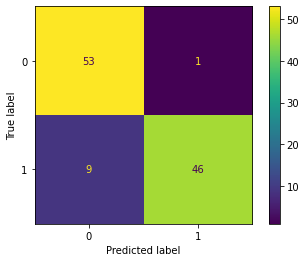

In [153]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

In [154]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.979
Recall: 0.836
F1: 0.902
Accuracy: 0.908


In [315]:
def gen_KM(r, num_samples, random_K=False, half_sync=False):
    """
    
    """
    df = pd.DataFrame() # Master df
    
    for i in range(num_samples):
        
        df1 = pd.DataFrame(columns=['# Edges', '# Nodes', 'Min Degree', 'Max Degree', 'Diameter', 'Concentrated'])
        temp = pd.DataFrame() # Dynamics df
        
        nodes = 50
        
        ######################################
        neighbors = int(random.uniform(20, 25))
        ######################################
        
        probability = random.uniform(0, 1)
        G = nx.newman_watts_strogatz_graph(nodes, neighbors, probability)
        
        if random_K: K = random.uniform(0.5, 4.5)
        else: K = 1.96
        
        if nx.is_connected(G):
            # Number of Edges and Nodes
            edges = G.number_of_edges()
            nodes = G.number_of_nodes()

            # Min and Max degree
            degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
            dmax = max(degree_sequence)
            dmin = min(degree_sequence)

            # Diameter of graph
            diam = nx.diameter(G)

            # Applying Kuramoto
            adj_mat = nx.to_numpy_array(G)

            if half_sync:
                natfreqs = np.repeat(2 * np.pi * 0, nodes)
                model = Kuramoto(coupling=K, dt=0.01, T=25, natfreqs=natfreqs, half_sync=half_sync)
            else:
                model = Kuramoto(coupling=K, dt=0.01, T=25, n_nodes=nodes, half_sync=half_sync)

            sim = model.run(adj_mat)
            conc = int(model.concentrated)
            
            df1.at[len(df1.index)] = [edges, nodes, dmin, dmax, diam, conc]

            df2 = pd.DataFrame(sim[:,:r].flatten(order='C')).T
            temp = pd.concat([df2, df1], axis=1)

            df = pd.concat([df, temp], ignore_index=True)
    
    return df

In [316]:
KM50_1000 = gen_KM(250, 1000)

In [411]:
KM50_1000

,0,1,2,3,4,5,6,7,8,9,...,12496,12497,12498,12499,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,1.215944,1.223092,1.230250,1.237416,1.244591,1.251776,1.258971,1.266175,1.273389,1.280614,...,-2.078885,-2.100218,-2.121295,-2.142115,825,50,23,39,2,0
1,6.185895,6.206897,6.228060,6.249377,6.270847,6.292463,6.314221,6.336115,6.358140,6.380289,...,1.225167,1.223876,1.222594,1.221319,936,50,30,45,2,0
2,4.296513,4.296288,4.296064,4.295840,4.295616,4.295394,4.295172,4.294950,4.294730,4.294510,...,5.039943,5.040362,5.040777,5.041187,563,50,22,24,3,0
3,4.383439,4.367991,4.352497,4.336955,4.321364,4.305724,4.290033,4.274290,4.258493,4.242642,...,-0.980013,-0.993875,-1.007889,-1.022058,579,50,20,27,3,0
4,2.339744,2.360627,2.381471,2.402269,2.423015,2.443703,2.464327,2.484883,2.505363,2.525764,...,2.641396,2.648087,2.654716,2.661282,690,50,22,33,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.564522,4.571525,4.578516,4.585497,4.592468,4.599432,4.606388,4.613338,4.620283,4.627224,...,-2.121534,-2.135376,-2.149149,-2.162850,1010,50,33,47,2,0
996,2.584719,2.591082,2.597435,2.603778,2.610111,2.616433,2.622745,2.629046,2.635337,2.641618,...,0.896464,0.899626,0.902806,0.906003,814,50,26,38,2,1
997,3.568175,3.572661,3.577196,3.581779,3.586412,3.591097,3.595833,3.600622,3.605465,3.610363,...,4.561043,4.557962,4.554888,4.551821,929,50,28,44,2,0
998,4.067019,4.082615,4.098183,4.113725,4.129240,4.144731,4.160198,4.175642,4.191065,4.206467,...,6.471830,6.481265,6.490637,6.499946,937,50,28,46,2,0


In [412]:
X, y = KM50_1000.iloc[:, :-1], KM50_1000.iloc[:, [-1]]
y = y.astype('int')

In [413]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [414]:
X_resampled

,0,1,2,3,4,5,6,7,8,9,...,12495,12496,12497,12498,12499,# Edges,# Nodes,Min Degree,Max Degree,Diameter
0,1.215944,1.223092,1.230250,1.237416,1.244591,1.251776,1.258971,1.266175,1.273389,1.280614,...,-2.057301,-2.078885,-2.100218,-2.121295,-2.142115,825,50,23,39,2
1,6.185895,6.206897,6.228060,6.249377,6.270847,6.292463,6.314221,6.336115,6.358140,6.380289,...,1.226464,1.225167,1.223876,1.222594,1.221319,936,50,30,45,2
2,4.296513,4.296288,4.296064,4.295840,4.295616,4.295394,4.295172,4.294950,4.294730,4.294510,...,5.039520,5.039943,5.040362,5.040777,5.041187,563,50,22,24,3
3,4.383439,4.367991,4.352497,4.336955,4.321364,4.305724,4.290033,4.274290,4.258493,4.242642,...,-0.966302,-0.980013,-0.993875,-1.007889,-1.022058,579,50,20,27,3
4,2.339744,2.360627,2.381471,2.402269,2.423015,2.443703,2.464327,2.484883,2.505363,2.525764,...,2.634642,2.641396,2.648087,2.654716,2.661282,690,50,22,33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,3.004861,3.016427,3.027978,3.039513,3.051030,3.062529,3.074007,3.085465,3.096902,3.108315,...,2.358548,2.353917,2.349321,2.344760,2.340234,611,50,22,30,3
1964,3.004861,3.016427,3.027978,3.039513,3.051030,3.062529,3.074007,3.085465,3.096902,3.108315,...,2.358548,2.353917,2.349321,2.344760,2.340234,611,50,22,30,3
1965,2.149610,2.153407,2.157228,2.161072,2.164939,2.168830,2.172745,2.176684,2.180646,2.184633,...,3.366913,3.369002,3.371067,3.373107,3.375122,1054,50,34,48,2
1966,3.634843,3.649391,3.663969,3.678579,3.693219,3.707890,3.722592,3.737323,3.752085,3.766877,...,6.449107,6.457952,6.466703,6.475359,6.483919,735,50,24,36,2


In [336]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size = 0.25,
                                                    stratify = y_resampled)

In [174]:
svc = SVC(kernel = 'poly', C = 3.5, random_state = 0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

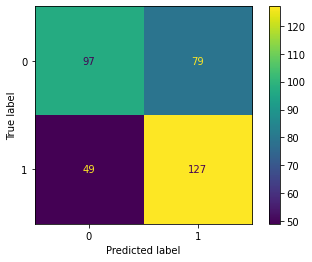

In [175]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

In [176]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.617
Recall: 0.722
F1: 0.665
Accuracy: 0.636


## Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier as rf

In [337]:
clf = rf(max_depth=5, random_state=0, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

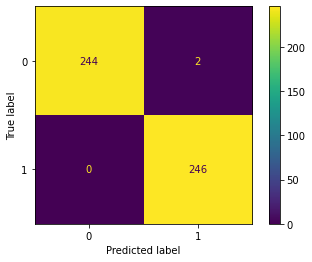

In [338]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [339]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
std = std.reshape((12505,1))
feature_names = list(X_resampled.columns)

In [349]:
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances[forest_importances > 0.00005]

# fig, ax = plt.subplots()
# forest_importances.plot.bar()


# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()
forest_importances

12       0.000630
147      0.001294
166      0.000501
170      0.001408
197      0.000822
           ...   
12413    0.000743
12468    0.000496
12472    0.001197
12476    0.000832
12485    0.000178
Length: 788, dtype: float64

In [276]:
clf = rf(max_depth=5, random_state=0, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

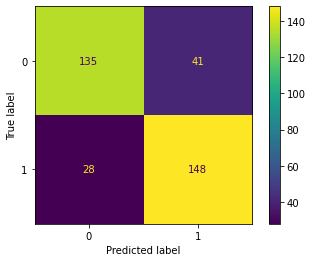

In [277]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [278]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.783
Recall: 0.841
F1: 0.811
Accuracy: 0.804


In [280]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
std = std.reshape(12505,1)
feature_names = list(X_resampled.columns)

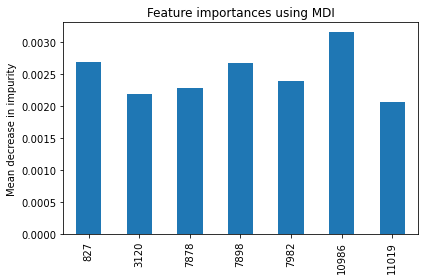

In [284]:
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances[forest_importances > 0.002]

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [291]:
clf.estimators_[9].feature_importances_.shape

(12505,)

In [293]:
def gen_KM_nodynamics(r, num_samples, random_K=False, half_sync=False):
    """
    
    """
    df = pd.DataFrame(columns=['# Edges', '# Nodes', 'Min Degree', 'Max Degree', 'Diameter', 'Concentrated'])
    
    for i in range(num_samples):
        
        nodes = 50
        
        ######################################
        neighbors = int(random.uniform(20, 25))
        ######################################
        
        probability = random.uniform(0, 1)
        G = nx.newman_watts_strogatz_graph(nodes, neighbors, probability)
        
        if random_K: K = random.uniform(0.5, 4.5)
        else: K = 1.96
        
        if nx.is_connected(G):
            # Number of Edges and Nodes
            edges = G.number_of_edges()
            nodes = G.number_of_nodes()

            # Min and Max degree
            degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
            dmax = max(degree_sequence)
            dmin = min(degree_sequence)

            # Diameter of graph
            diam = nx.diameter(G)

            # Applying Kuramoto
            adj_mat = nx.to_numpy_array(G)

            if half_sync:
                natfreqs = np.repeat(2 * np.pi * 0, nodes)
                model = Kuramoto(coupling=K, dt=0.01, T=25, natfreqs=natfreqs, half_sync=half_sync)
            else:
                model = Kuramoto(coupling=K, dt=0.01, T=25, n_nodes=nodes, half_sync=half_sync)

            sim = model.run(adj_mat)
            conc = int(model.concentrated)
            
            df.at[len(df.index)] = [edges, nodes, dmin, dmax, diam, conc]

#             df2 = pd.DataFrame(sim[:,:r].flatten(order='C')).T
#             temp = pd.concat([df2, df1], axis=1)

#             df = pd.concat([df, temp], ignore_index=True)
    
    return df

In [297]:
df_nodynamics = gen_KM_nodynamics(250, 1000)

In [351]:
X, y = df_nodynamics.iloc[:, :-1], df_nodynamics.iloc[:, [-1]]
y = y.astype('int')

In [352]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [353]:
X_resampled

,# Edges,# Nodes,Min Degree,Max Degree,Diameter
0,1087,50,36,49,2
1,882,50,29,42,2
2,926,50,28,45,2
3,773,50,25,38,2
4,809,50,24,41,2
...,...,...,...,...,...
1953,706,50,24,34,2
1954,860,50,25,40,2
1955,809,50,27,38,2
1956,980,50,33,47,2


In [354]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size = 0.25,
                                                    stratify = y_resampled)

In [355]:
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

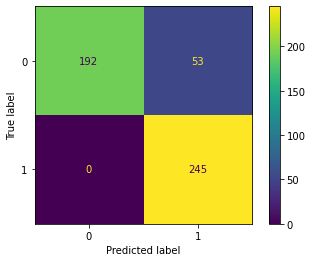

In [356]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [357]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.822
Recall: 1.000
F1: 0.902
Accuracy: 0.892


In [358]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = list(X_resampled.columns)

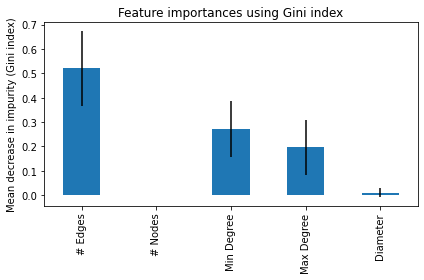

In [359]:
forest_importances = pd.Series(importances, index=feature_names)
# forest_importances = forest_importances[forest_importances > 0.002]

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Gini index")
ax.set_ylabel("Mean decrease in impurity (Gini index)")
fig.tight_layout()

## Trying to minimizing the edge density

In [365]:
def gen_KM_nodynamics_fixed_neigh(r, num_samples, random_K=False, half_sync=False):
    """
    
    """
    df = pd.DataFrame(columns=['# Edges', '# Nodes', 'Min Degree', 'Max Degree', 'Diameter', 'Concentrated'])
    
    for i in range(num_samples):
        
        nodes = 50
        
        ######################################
        neighbors = 15
        ######################################
        
        probability = random.uniform(0, 1)
        G = nx.newman_watts_strogatz_graph(nodes, neighbors, probability)
        
        if random_K: K = random.uniform(0.5, 4.5)
        else: K = 1.96
        
        if nx.is_connected(G):
            # Number of Edges and Nodes
            edges = G.number_of_edges()
            nodes = G.number_of_nodes()

            # Min and Max degree
            degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
            dmax = max(degree_sequence)
            dmin = min(degree_sequence)

            # Diameter of graph
            diam = nx.diameter(G)

            # Applying Kuramoto
            adj_mat = nx.to_numpy_array(G)

            if half_sync:
                natfreqs = np.repeat(2 * np.pi * 0, nodes)
                model = Kuramoto(coupling=K, dt=0.01, T=25, natfreqs=natfreqs, half_sync=half_sync)
            else:
                model = Kuramoto(coupling=K, dt=0.01, T=25, n_nodes=nodes, half_sync=half_sync)

            sim = model.run(adj_mat)
            conc = int(model.concentrated)
            
            df.at[len(df.index)] = [edges, nodes, dmin, dmax, diam, conc]

#             df2 = pd.DataFrame(sim[:,:r].flatten(order='C')).T
#             temp = pd.concat([df2, df1], axis=1)

#             df = pd.concat([df, temp], ignore_index=True)
    
    return df

In [366]:
df_fn_nodynamics = gen_KM_nodynamics_fixed_neigh(250, 1000)

In [367]:
df_fn_nodynamics

,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,489,50,14,24,3,0
1,476,50,15,24,3,0
2,472,50,15,24,3,0
3,689,50,18,33,2,0
4,412,50,14,20,3,0
...,...,...,...,...,...,...
995,368,50,14,18,3,0
996,528,50,17,26,2,0
997,685,50,19,34,2,0
998,469,50,15,23,3,0


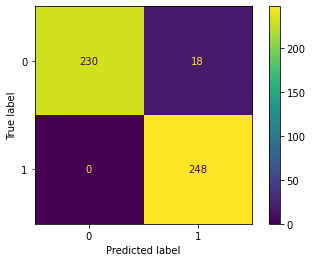

In [369]:
X, y = df_fn_nodynamics.iloc[:, :-1], df_fn_nodynamics.iloc[:, [-1]]
y = y.astype('int')

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size = 0.25,
                                                    stratify = y_resampled)

clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [370]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.932
Recall: 1.000
F1: 0.965
Accuracy: 0.964


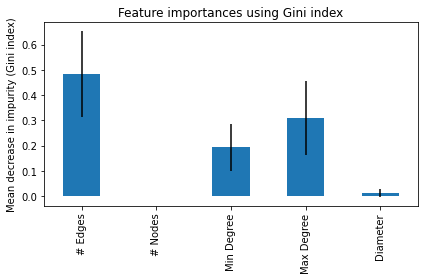

In [372]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = list(X_resampled.columns)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Gini index")
ax.set_ylabel("Mean decrease in impurity (Gini index)")
fig.tight_layout()

In [415]:
X0 = pd.concat([X_resampled, y_resampled], axis = 1)
X0

,0,1,2,3,4,5,6,7,8,9,...,12496,12497,12498,12499,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,1.215944,1.223092,1.230250,1.237416,1.244591,1.251776,1.258971,1.266175,1.273389,1.280614,...,-2.078885,-2.100218,-2.121295,-2.142115,825,50,23,39,2,0
1,6.185895,6.206897,6.228060,6.249377,6.270847,6.292463,6.314221,6.336115,6.358140,6.380289,...,1.225167,1.223876,1.222594,1.221319,936,50,30,45,2,0
2,4.296513,4.296288,4.296064,4.295840,4.295616,4.295394,4.295172,4.294950,4.294730,4.294510,...,5.039943,5.040362,5.040777,5.041187,563,50,22,24,3,0
3,4.383439,4.367991,4.352497,4.336955,4.321364,4.305724,4.290033,4.274290,4.258493,4.242642,...,-0.980013,-0.993875,-1.007889,-1.022058,579,50,20,27,3,0
4,2.339744,2.360627,2.381471,2.402269,2.423015,2.443703,2.464327,2.484883,2.505363,2.525764,...,2.641396,2.648087,2.654716,2.661282,690,50,22,33,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,3.004861,3.016427,3.027978,3.039513,3.051030,3.062529,3.074007,3.085465,3.096902,3.108315,...,2.353917,2.349321,2.344760,2.340234,611,50,22,30,3,1
1964,3.004861,3.016427,3.027978,3.039513,3.051030,3.062529,3.074007,3.085465,3.096902,3.108315,...,2.353917,2.349321,2.344760,2.340234,611,50,22,30,3,1
1965,2.149610,2.153407,2.157228,2.161072,2.164939,2.168830,2.172745,2.176684,2.180646,2.184633,...,3.369002,3.371067,3.373107,3.375122,1054,50,34,48,2,1
1966,3.634843,3.649391,3.663969,3.678579,3.693219,3.707890,3.722592,3.737323,3.752085,3.766877,...,6.457952,6.466703,6.475359,6.483919,735,50,24,36,2,1


In [416]:
X0_true = X0[X0['Concentrated'] == 1]
X0_true = X0_true.reset_index()
X0_true = X0_true.drop('index', axis=1)
X0_true = np.array(X0_true)

In [417]:
X0_true.shape

(984, 12506)

In [418]:
X0_false = X0[X0['Concentrated'] == 0]
X0_false = X0_false.reset_index()
X0_false = X0_false.drop('index', axis=1)
X0_false = np.array(X0_false)

In [419]:
X0_false.shape

(984, 12506)